<a href="https://colab.research.google.com/github/neel26desai/cmpe255_assignment3/blob/main/CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset


## Buisness Understanding Goals and Data Mining KPI
a.	We have a dataset, which contains various features related to health of heart, our task if to develop a model which can predict with accuracy, if a person is at a high risk of heart attack or low.
b.	Data Mining Goal and KPI:
i.	Build a binary classification model having the following performance metrics:
1.	Accuracy : 75%+
2.	Recall : 75%+
3.	Precision : 75%


In [ ]:
!pip install pycaret

In [3]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding

###Gathering and Describing Data

For understanding what each column represents refer to datset link

In [30]:
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [31]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
df.shape

(303, 14)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
df.describe()#get summary statitics

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the above data exploration we know the data type for of each columns, the number of missing values in each columns and the summary statistics for each columns

### Data Quality

In [35]:
#check fo Na values
total_na=  df.isna().sum().sum()
print(f'The dataset has {total_na} missing value')


The dataset has 0 missing value


In [44]:
#for each columns lets see the possible unique value
cat_cols =[]
for col in df.columns:
  #if the column has less than 5 unique values consider it categorical
  n = df[col].nunique()
  print(col,n)
  if n<=5:
    cat_cols.append(col)


age 41
sex 2
cp 4
trtbps 49
chol 152
fbs 2
restecg 3
thalachh 91
exng 2
oldpeak 40
slp 3
caa 5
thall 4
output 2


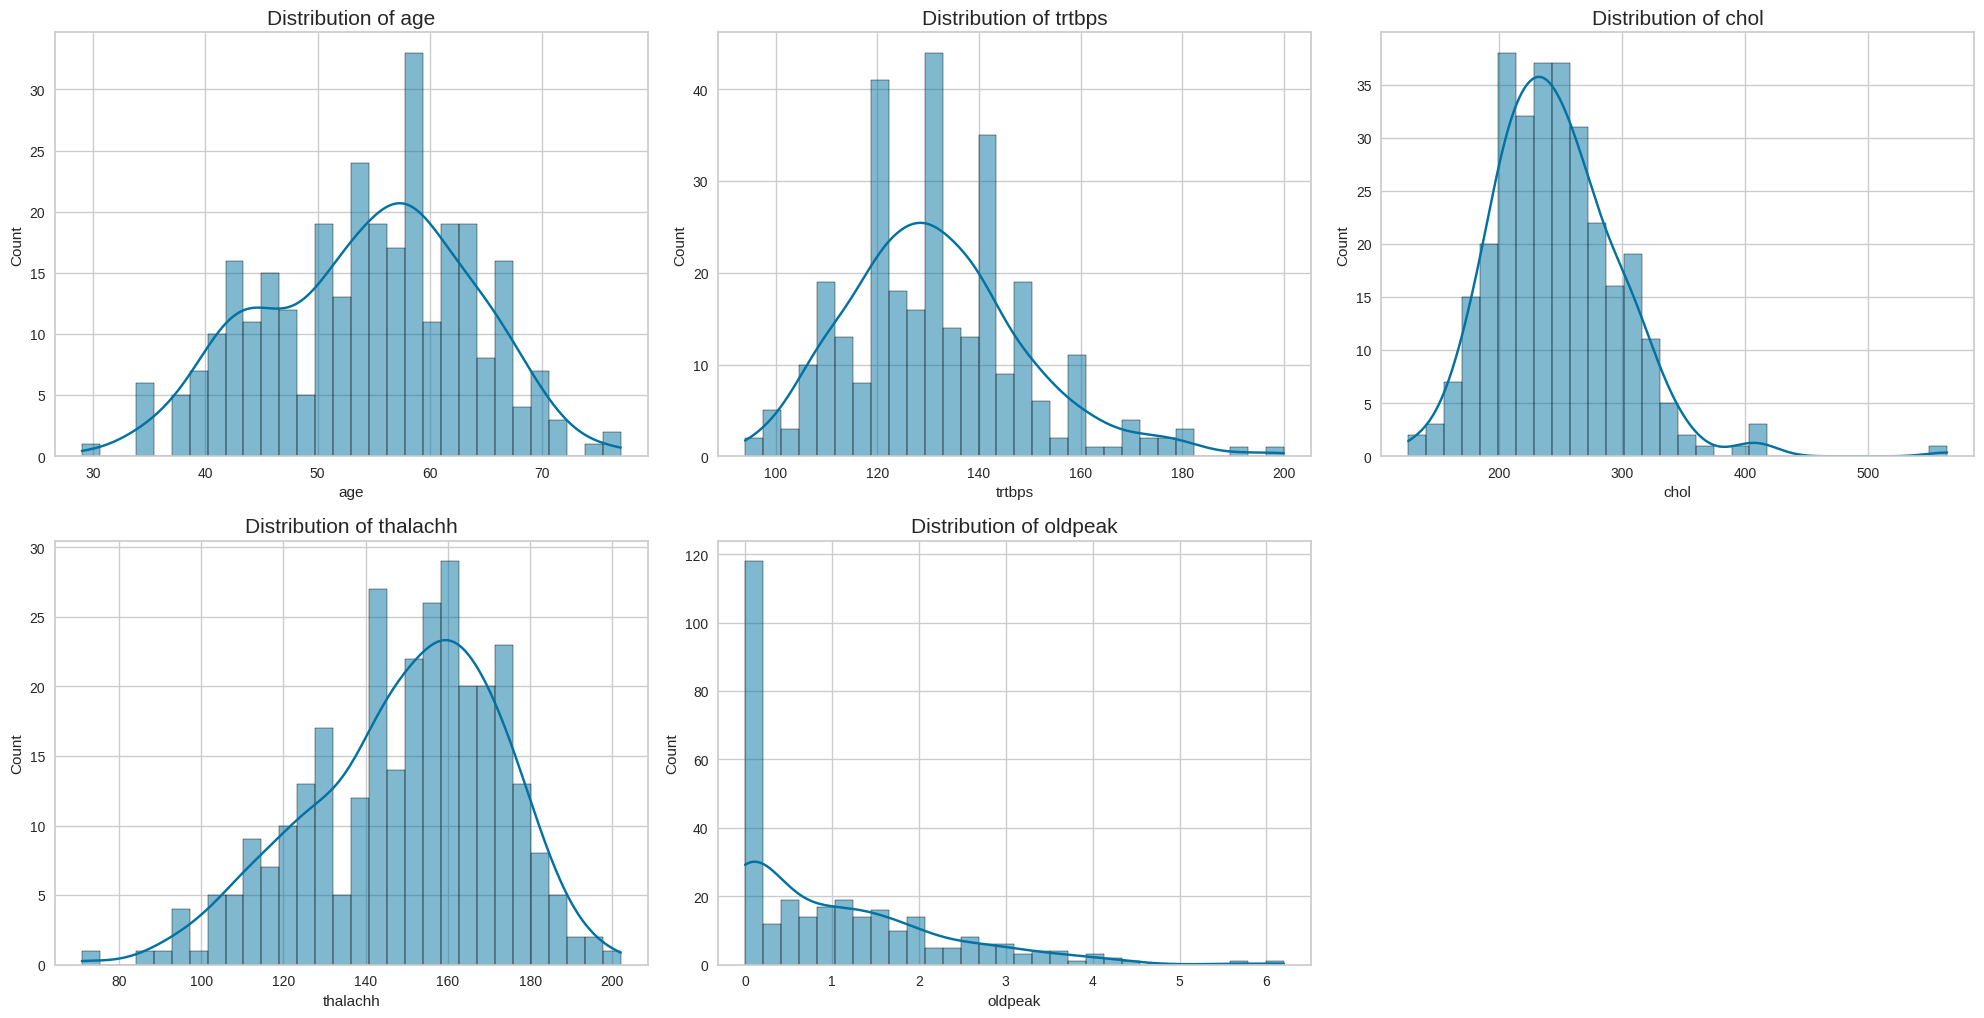

In [50]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# List of numerical features
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

# Plotting histograms for numerical features
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}', fontsize=15)

# Adjust layout
plt.tight_layout()
plt.show()

In [53]:
cat_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

In [60]:
for i,col in enumerate(cat_cols,start=1):
  print(i,col)


1 sex
2 cp
3 fbs
4 restecg
5 exng
6 slp
7 caa
8 thall
9 output


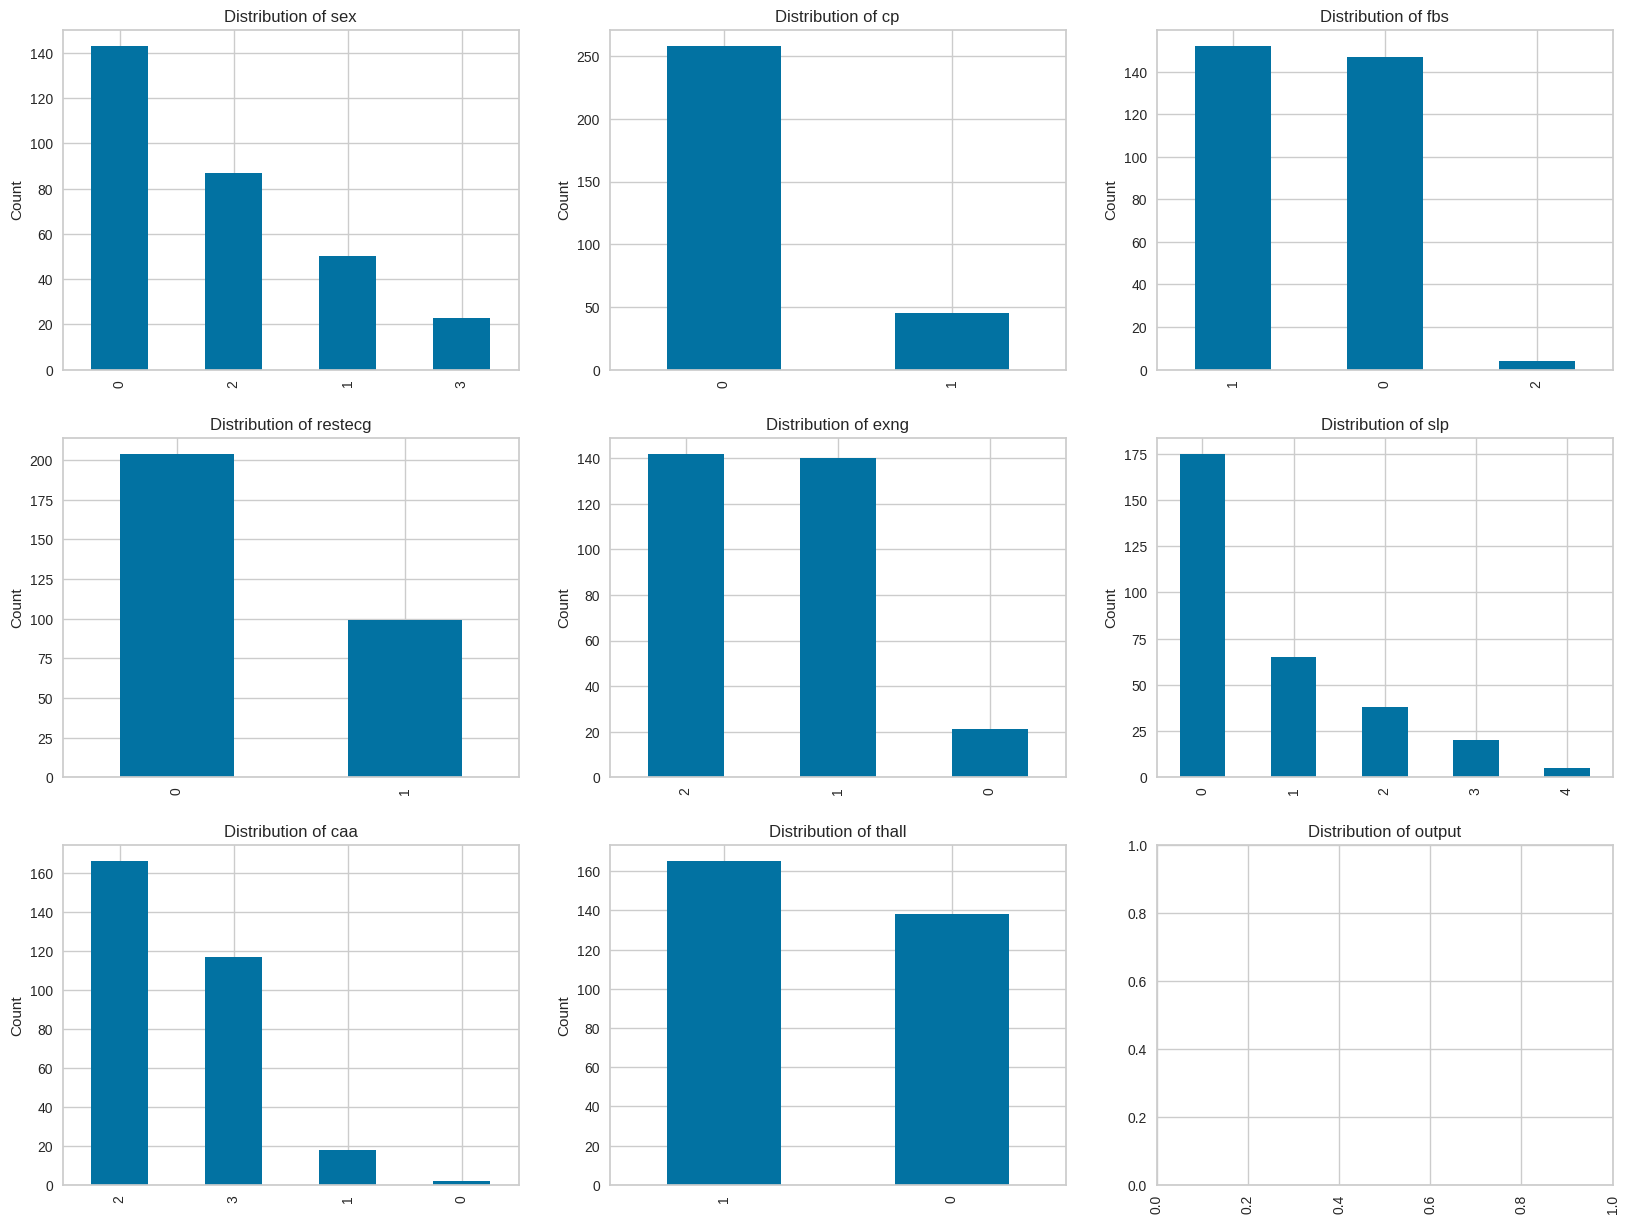

In [66]:
#let su check for biases, first we check for bias in the sex column and then we can check for bias in target columns
#let us checks for distribution of all features
plt.figure(figsize=(20, 15))
for i,col in enumerate(cat_cols,start=1):
  temp = df[col].value_counts()
  temp.plot(kind='bar')
  plt.ylabel('Count')
  plt.subplot(3, 3, i)
  plt.title(f'Distribution of {col}')
  plt.xticks(rotation=90)
plt.show()

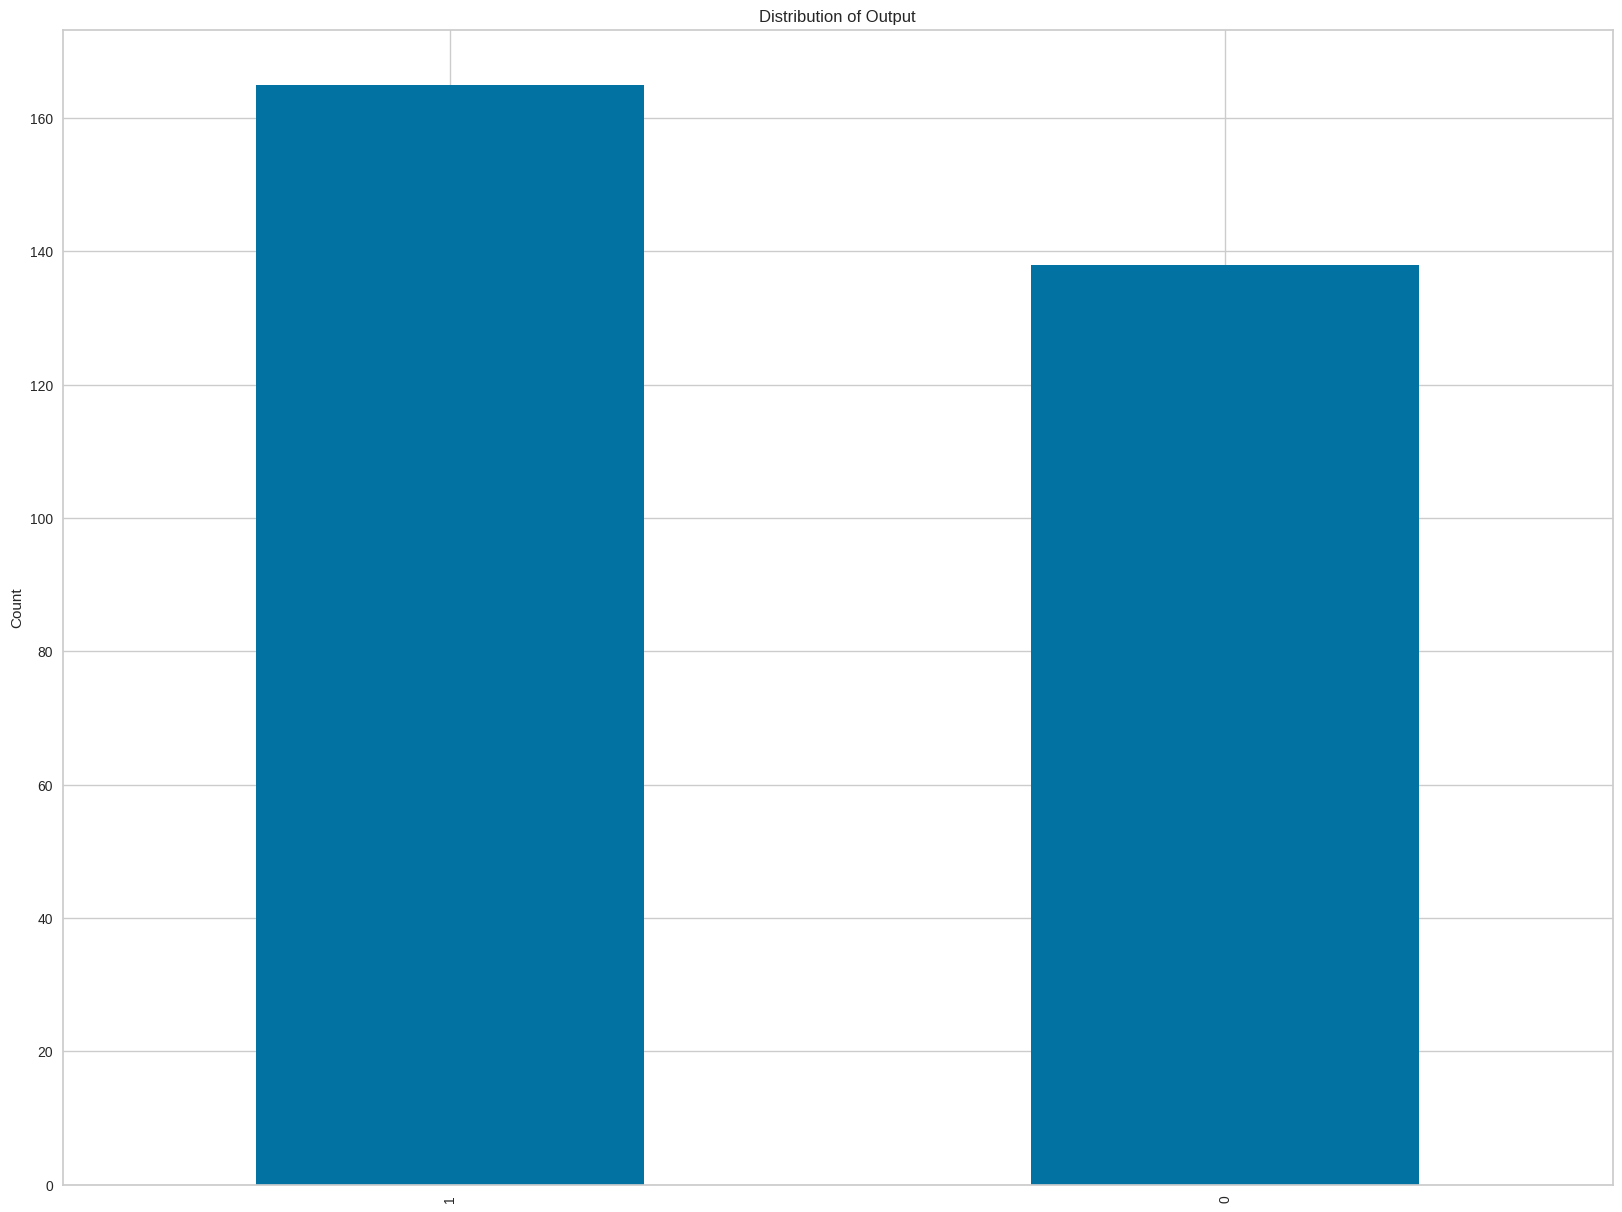

In [67]:
#checkin the distribution of output to make sure we dont have any class bias
plt.figure(figsize=(20, 15))
temp = df['output'].value_counts()
temp.plot(kind='bar')
plt.ylabel('Count')
plt.title(f'Distribution of Output')
plt.xticks(rotation=90)
plt.show()

Based on the above distribution we can tell that we dont have a major class bias for our target

<Axes: >

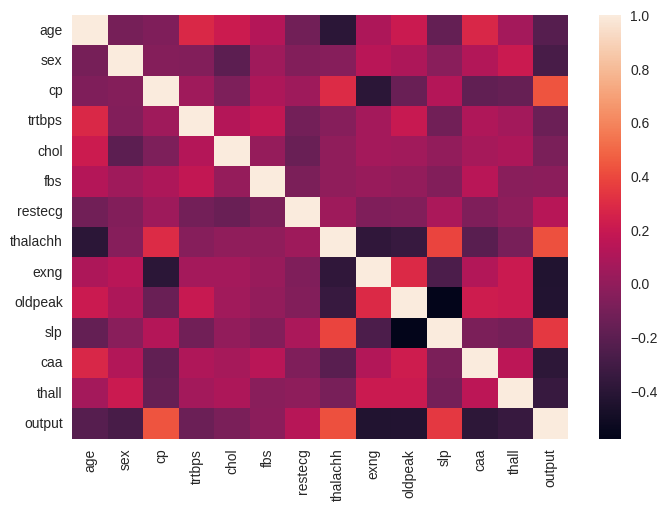

In [70]:
#before we move forward lets check to correlation between different columns
sns.heatmap(df.corr())

Let us see how each column is related with  target

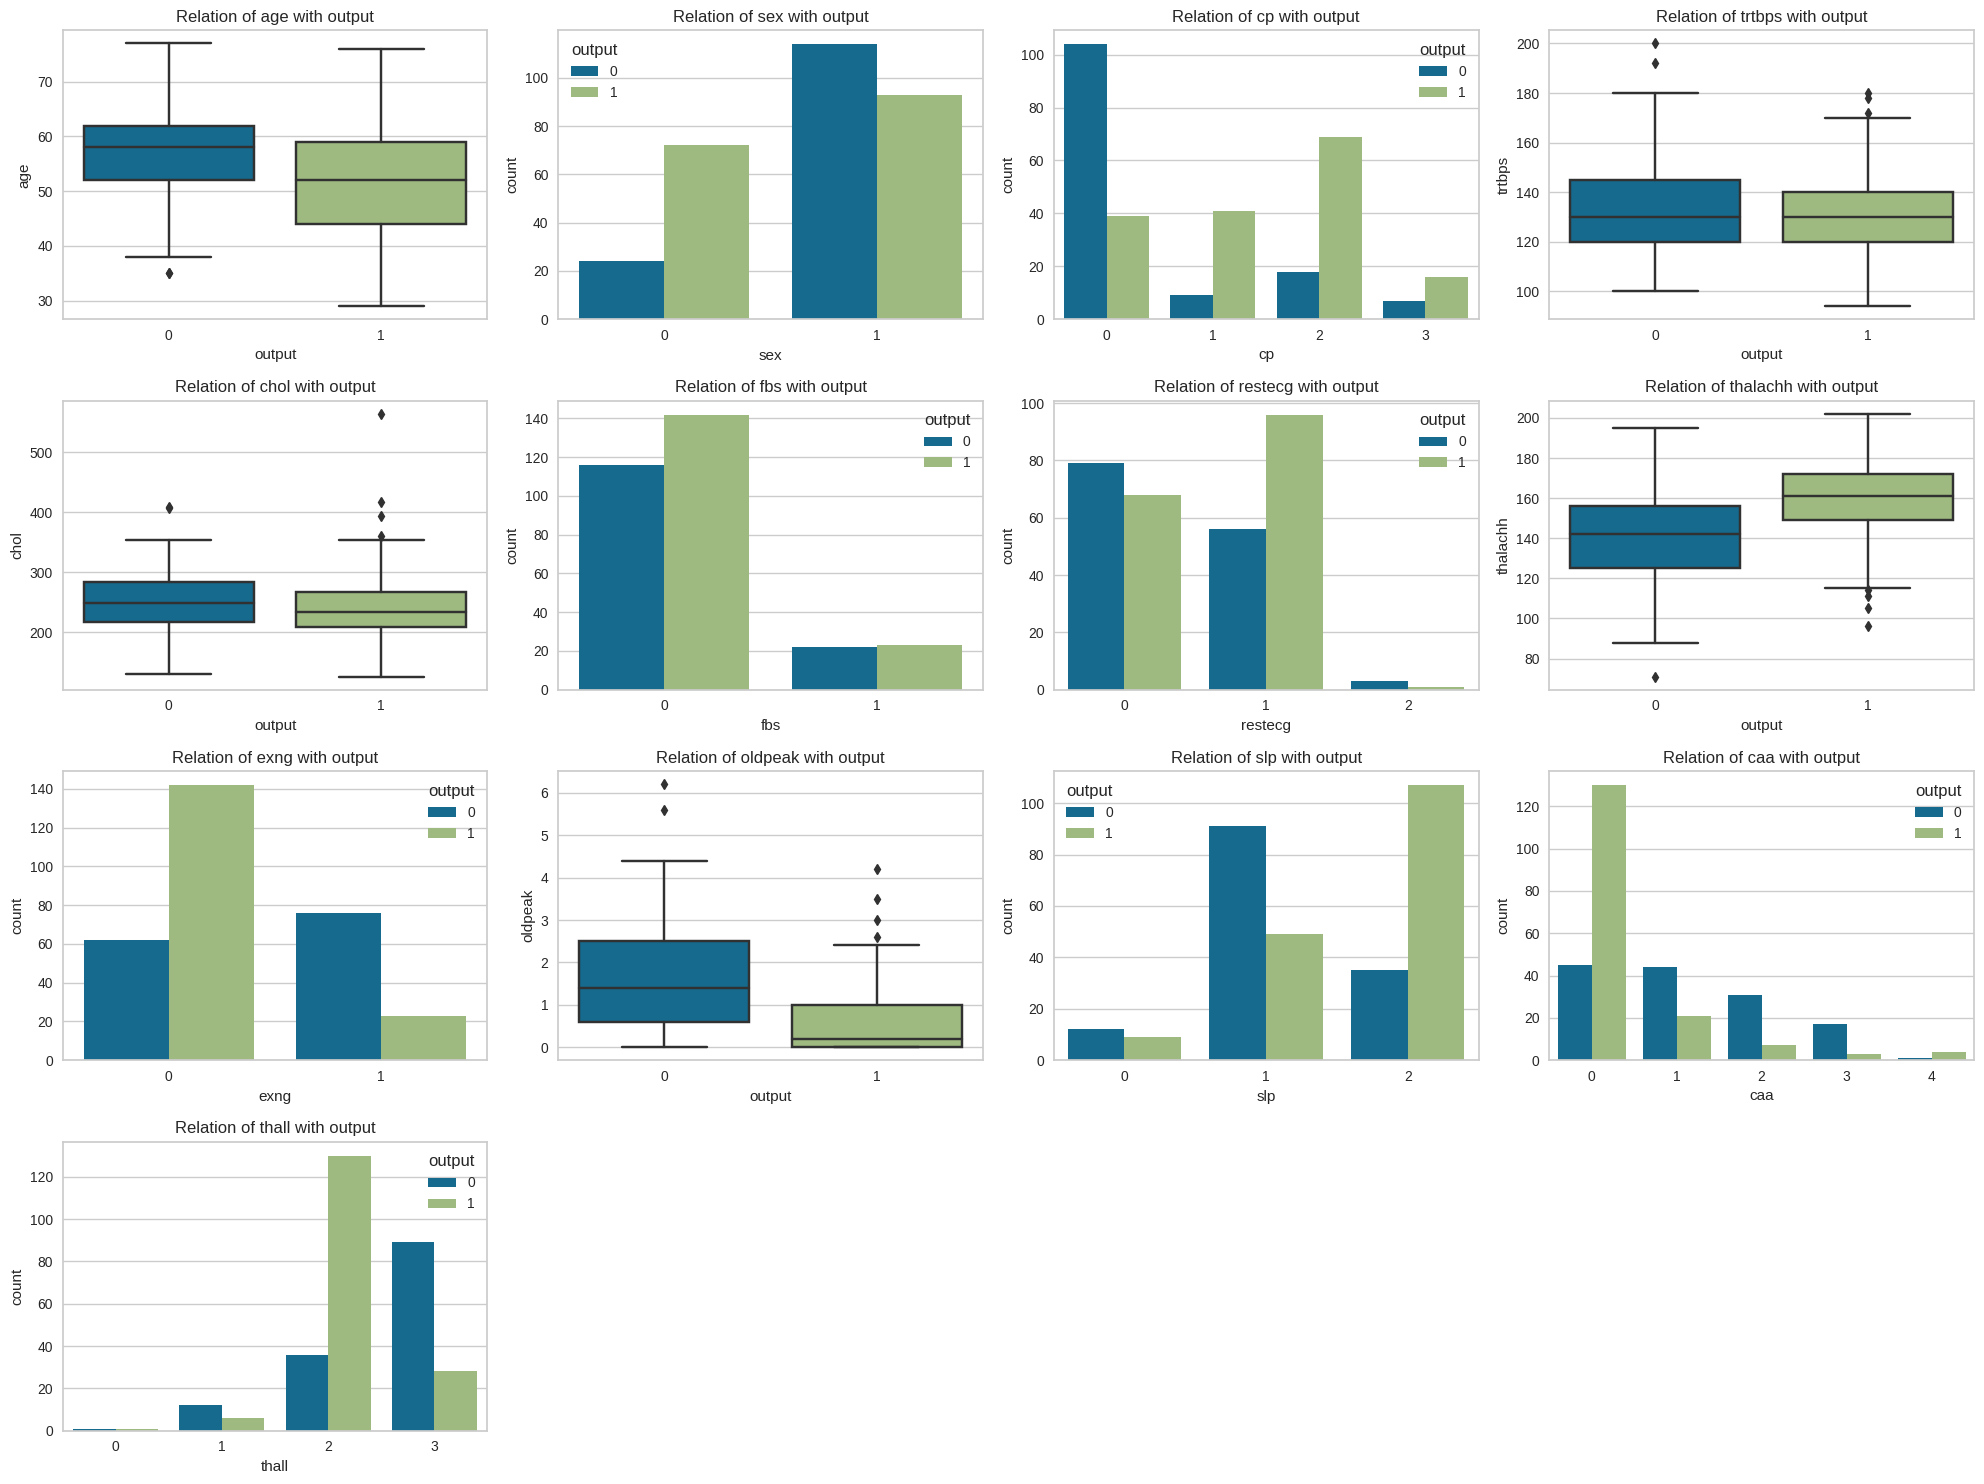

In [71]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# List of columns excluding the 'output' column
columns = df.columns.drop('output')

# Loop through each column and plot its relationship with the 'output' column
for i, column in enumerate(columns, 1):
    plt.subplot(4, 4, i)

    # If the column is 'sex' or 'cp' or 'fbs' or 'restecg' or 'exng' or 'slp' or 'caa' or 'thall',
    # we consider it as a categorical column and use bar plot
    if column in ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']:
        sns.countplot(data=df, x=column, hue='output')
    else:
        # For numerical columns, we use boxplots
        sns.boxplot(data=df, x='output', y=column)

    plt.title(f'Relation of {column} with output', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


Insights from the EDA:
Absolutely, let's summarize the insights based on the previous explorations and the visualizations that were generated:

Univariate Analysis:
Age (age): The age distribution seemed somewhat normal with a slight skew to the right, indicating that there were more younger individuals in the dataset than older ones.
Resting Blood Pressure (trtbps): The distribution of resting blood pressure appeared right-skewed, with most individuals having a blood pressure in the range of 120-140 mm Hg.
Cholesterol Level (chol): The cholesterol level distribution was also right-skewed, with most individuals having levels between 200 and 300 mg/dl.
Maximum Heart Rate Achieved (thalachh): The distribution of the maximum heart rate achieved was somewhat left-skewed, indicating that most individuals in the dataset have a higher maximum heart rate.
ST Depression Induced by Exercise Relative to Rest (oldpeak): This feature had a right-skewed distribution, with most values clustered near zero.
Bivariate Analysis (based on plans, but not yet visualized):
Numerical vs. Output: Boxplots can be used to observe the distribution of numerical values across different categories of the output. This can help in understanding if certain numerical ranges are more prevalent in one class than the other.
Categorical vs. Output: Bar plots can provide insights into how different categories in a categorical feature relate to the output. For instance, if we had visualized the sex column against the output, we could determine if one gender had a higher likelihood of heart disease than the other.
Multivariate Analysis (based on plans, but not yet visualized):
Pair plots and correlation heatmaps can be used to analyze the relationships between multiple variables at once, providing a holistic view of how features interrelate and how they collectively impact the target variable.
From the Dataset Structure:
There were no missing values in the dataset.
The target variable (output) distribution was:
Class 1: ~54.46% (Indicating presence of heart disease)
Class 0: ~45.54% (Indicating absence of heart disease)
This showed a slight imbalance in the classes, but not severe.
These were the insights we were able to glean from the dataset.






## Data Preparation

Lets start by preparing the data before starting with modelling.
1. Cause we dont have alot of missing data we can drop the missing data
2. We normalize all the continous values

In [72]:
df=df.dropna()

As we are going to use an automl library it is going to take care of all the preprocessing/ data preparation required

In [14]:
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [15]:

# init setup on exp, our target column is diagnosis
exp.setup(df, target = 'output', session_id = 123)


,Description,Value
0,Session id,123
1,Target,output
2,Target type,Binary
3,Original data shape,"(303, 14)"
4,Transformed data shape,"(303, 14)"
5,Transformed train set shape,"(212, 14)"
6,Transformed test set shape,"(91, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


In [75]:
#checkout the required preprocessing steps
exp.get_config('pipeline')

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['age', 'sex', 'cp', 'trtbps',
                                             'chol', 'fbs', 'restecg',
                                             'thalachh', 'exng', 'oldpeak',
                                             'slp', 'caa', 'thall'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean',
                                                              verbose='deprecated'))),
                ('categorical_imputer',
                 TransformerWrapper(exclude=None, include=[],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='most_frequent',
                                                              verbose='deprecated')))],
         verbose=False)

## Modelling

In [16]:
#let compare list of base models that best fit out data
base_models = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8201,0.9212,0.8576,0.8186,0.8303,0.6358,0.6510,0.0290
ridge,Ridge Classifier,0.8201,0.0000,0.8841,0.8069,0.8359,0.6346,0.6558,0.0260
rf,Random Forest Classifier,0.8201,0.8924,0.8583,0.8236,0.8335,0.6349,0.6474,0.2020
lda,Linear Discriminant Analysis,0.8201,0.9162,0.8841,0.8069,0.8359,0.6346,0.6558,0.0270
lr,Logistic Regression,0.8154,0.9180,0.8750,0.8061,0.8310,0.6245,0.6463,1.0190
et,Extra Trees Classifier,0.8108,0.9003,0.8508,0.8150,0.8240,0.6180,0.6342,0.2650
xgboost,Extreme Gradient Boosting,0.8017,0.8562,0.8417,0.8145,0.8171,0.5972,0.6170,0.1140
qda,Quadratic Discriminant Analysis,0.8013,0.9013,0.8152,0.8273,0.8112,0.5986,0.6111,0.0300
gbc,Gradient Boosting Classifier,0.7972,0.8802,0.8152,0.8122,0.8084,0.5900,0.5992,0.1070
lightgbm,Light Gradient Boosting Machine,0.7872,0.8706,0.8152,0.8199,0.8024,0.5683,0.5907,0.2590


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Based on the above comparission, we found that Naives  Bayes gives us te best results.

In [78]:
#let us tune our model
tuned_model = exp.tune_model(base_models)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,0.9917,1.0000,0.8571,0.9231,0.8136,0.8281
1,0.8636,0.9583,1.0000,0.8000,0.8889,0.7179,0.7483
2,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
3,0.8095,0.9444,1.0000,0.7500,0.8571,0.5882,0.6455
4,0.8571,0.9815,0.8333,0.9091,0.8696,0.7123,0.7156
5,0.8571,0.9455,0.8182,0.9000,0.8571,0.7149,0.7182
6,0.9048,0.9000,1.0000,0.8462,0.9167,0.8073,0.8228
7,0.6667,0.8273,0.7273,0.6667,0.6957,0.3288,0.3303
8,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123,0.7156


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


After hyper parameter tuning we found that the orignal model performs better than others. Now we can move to evaluate phase

## Evaluation

In [81]:
predictions=exp.predict_model(base_models)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.8132,0.8741,0.8600,0.8113,0.8350,0.6202,0.6216


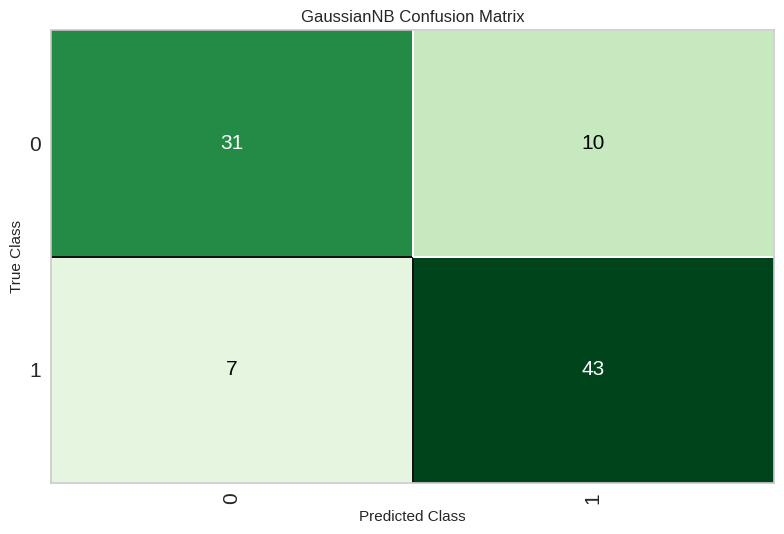

In [82]:
exp.plot_model(base_models,plot='confusion_matrix')

We have meet our data mining requiremnets so we can stop here and proceed to deployment

In [79]:
exp.evaluate_model(base_models)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Deployment

In [84]:
exp.save_model(base_models,'/content/drive/MyDrive/crisp_dm')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'cp', 'trtbps',
                                              'chol', 'fbs', 'restecg',
                                              'thalachh', 'exng', 'oldpeak',
                                              'slp', 'caa', 'thall'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated')

Now we can deploy the model where ever we like